## REGRESSION

**Question** Do you remember what the regression is?

Regresja to metoda statystyczna, której celem jest objaśnienie zależności wartości zmiennej zależnej (Y) od zbioru zmiennych niezależnych (X)

Today's analysis we will run on dataset 'car-mpg' which has the following columns: cylinders, displacement, horsepower, weight, acceleration, model year, origin and mpg. Mpg is decision attribute and stands for miles per gallon, which basically means the reverse of combustion (pl. spalanie). The dataset comes from https://archive.ics.uci.edu/ml/datasets/auto+mpg However, it does not have the original data, but normalized version.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f, f_oneway
import statsmodels.api as sm
%matplotlib inline
plt.style.use('ggplot')

In [33]:
data = pd.read_csv('car-mpg.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,18.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,15.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,18.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,16.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,17.0


As the first step of the task let's get to know with our data and its distribution.

In [49]:
def plot_creator():
    fig, ax=plt.subplots(1,1)
    fig.set_size_inches(15,15)
    ax.set_facecolor((1, 1, 1))
    ax.grid(color='gray', linestyle='--')
    return fig, ax

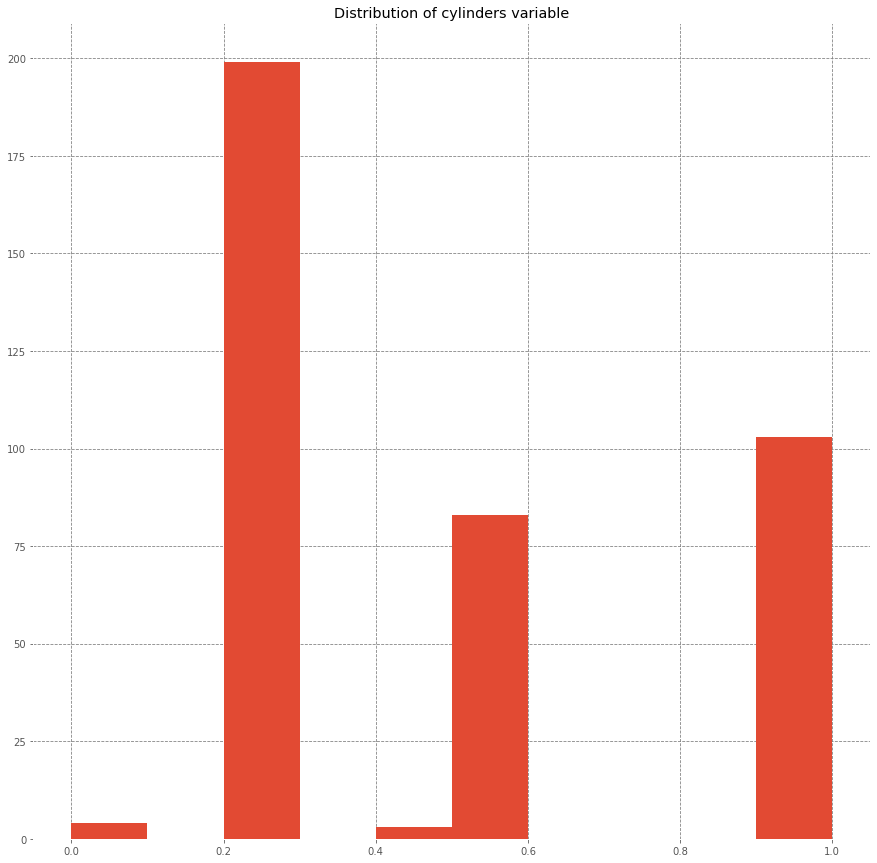

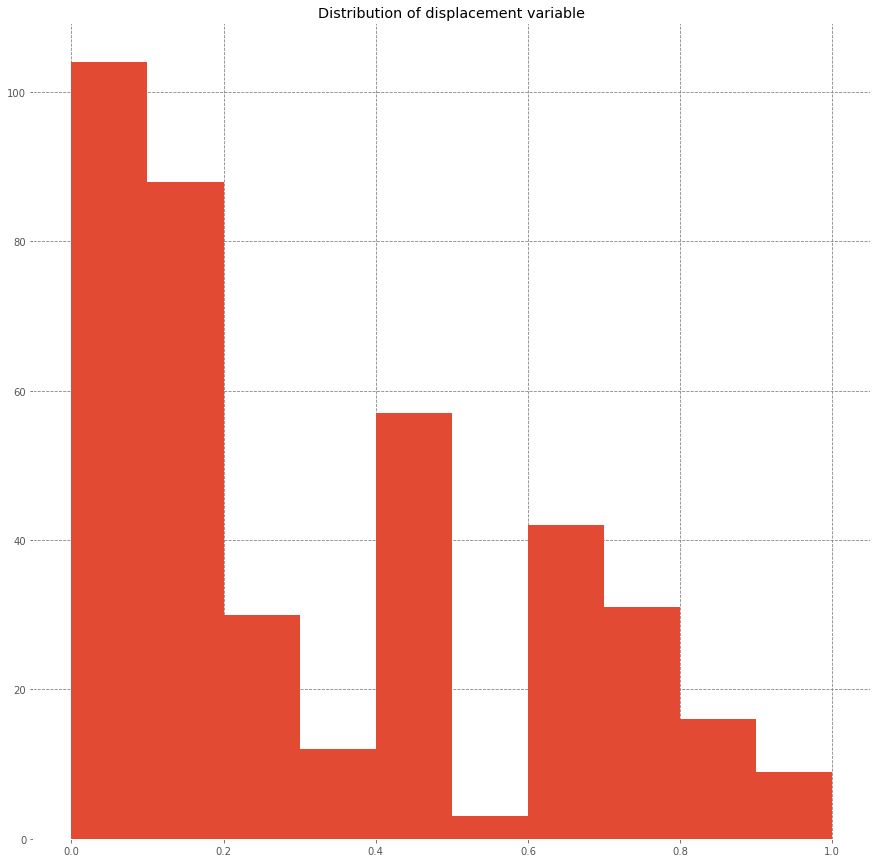

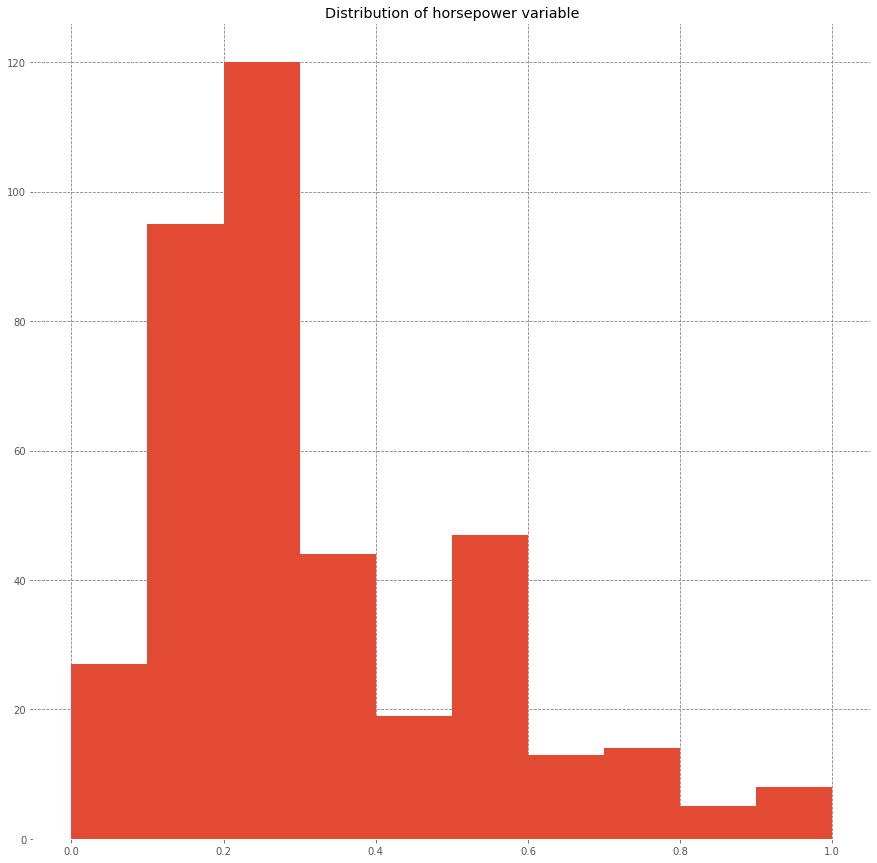

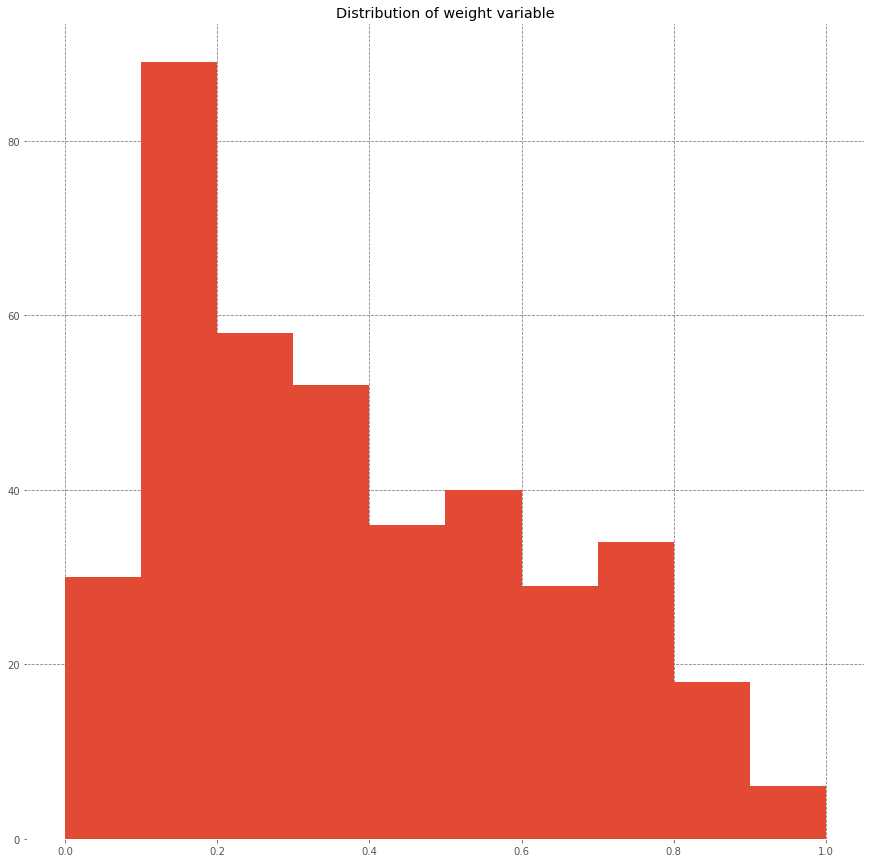

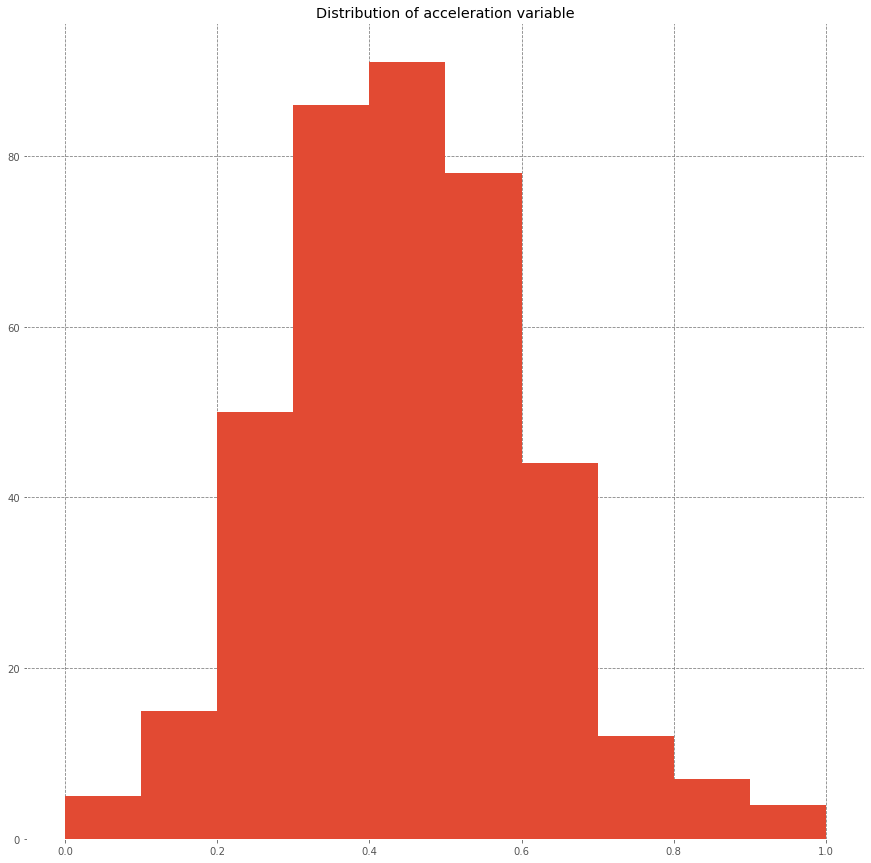

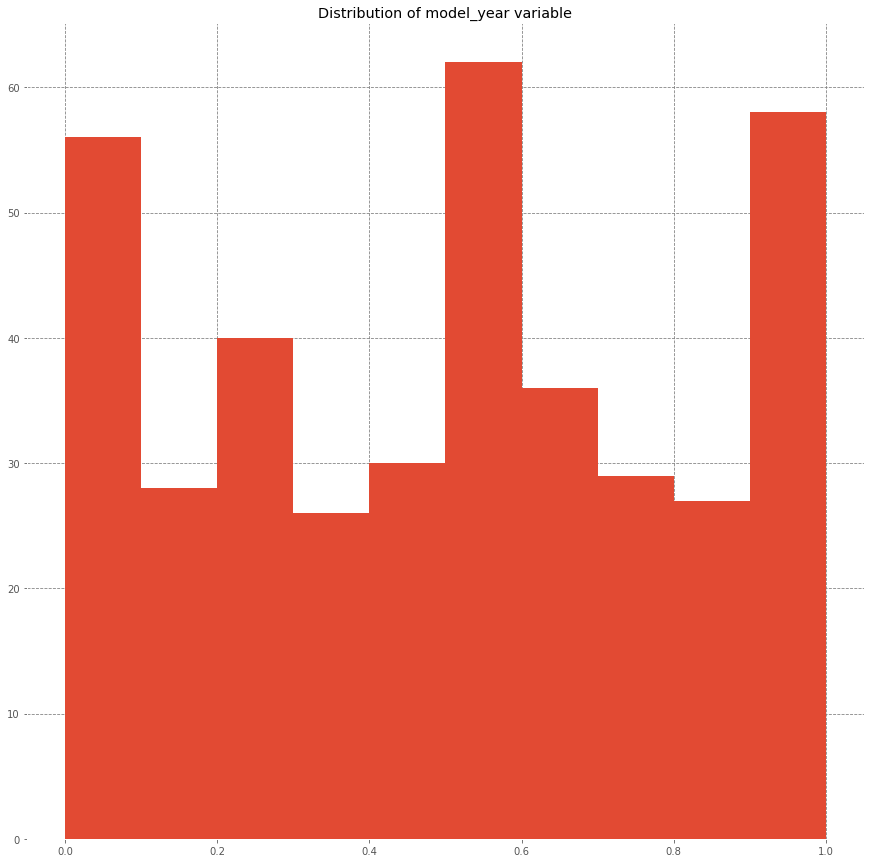

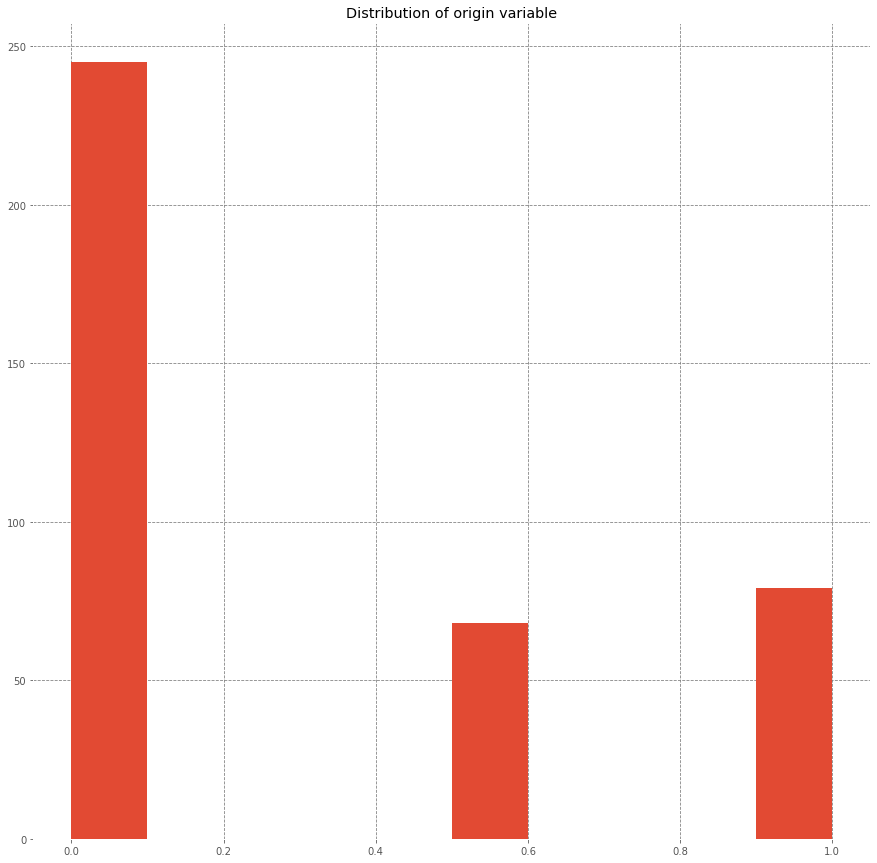

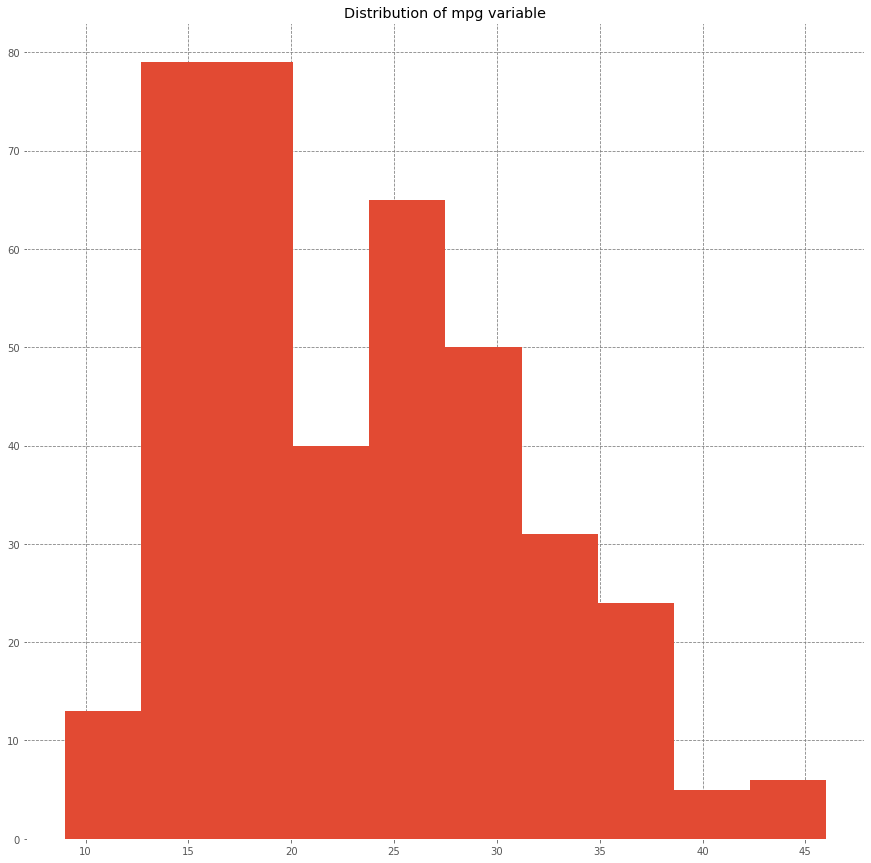

In [50]:
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']

# TODO Iterate through the columns (attributes) in our dataset and draw their histograms. 
for i, x in enumerate(columns):
    fig, ax=plot_creator()
    ax.hist(data[i])
    ax.set_title(f'Distribution of {x} variable')
    plt.show()
# Which attributes can be potentially more interesting in further analysis? 
# Najprawdopodobniej te związane z osiągami samochodu - wszystkie poza 'model_year' i 'origin'

### SIMPLE LINEAR REGRESSION

**Task** Write your own function which calculates linear regression step by step and plot the results. <br/>
*Hint* If you do not remember how it was calculated, look here: https://en.wikipedia.org/wiki/Simple_linear_regression

In [5]:
def LinearRegressionOne(x, y):
    xm=x.mean()
    ym=y.mean()
    
    t1=sum((x-xm)*(y-ym))
    t2=sum((x-xm)*(x-xm))
    a=t1/t2
    b=ym-xm*a
    
    return a,b # return parameters a and b of your linear function

In [6]:
LinearRegressionOne(data[2], data[7]) # TODO run your function on attributes 'horsepower' and 'mpg'

(-28.860049132825598, 32.453974180664275)

**Task** As you already wrote your own function which calculates simple linear regression, you can now use implementation from sklearn package. This time split your data to train and test set (use first 40 observations as test ones) and plot your results. Compare the results from your own implementation and this one from sklearn. Did you get similar coefficients for your linear function?

Rezultaty są identyczne do 10 miejsc po przecinku

In [7]:
# TODO simple linear regression with the usage of sklearn
def LinearRegressionOneScikit(x, y):
    model=linear_model.LinearRegression()
    xprim=pd.DataFrame(x)
    
    model.fit(xprim, y)
    return model.coef_[0], model.intercept_

LinearRegressionOneScikit(data[2], data[7])

(-28.860049132825644, 32.45397418066429)

#### Polynomial regression

We do not have to limit to only simple line but we also can create some other shapes. Run the following codes:

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


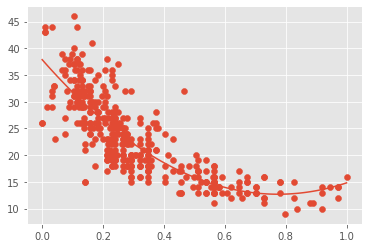

In [8]:
x = data.iloc[:,2:3]
y = data.iloc[:,-1]

x['x^2']=x[2]**2


reg = linear_model.LinearRegression().fit(x,y )
score = reg.score(x,y)

x_line = np.array(np.linspace(0,1,100))
y_line = reg.coef_[1]*x_line**2+ reg.coef_[0]*x_line+ reg.intercept_

plt.scatter(x[2],y)
plt.plot(x_line,y_line)

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


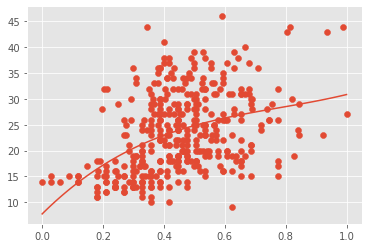

In [9]:
x = data.iloc[:,4:5]
y = data.iloc[:,-1]

x['x^2']=x[4]**2
x['x^3']=x[4]**3

reg = linear_model.LinearRegression().fit(x,y )
score = reg.score(x,y)

x_line = np.array(np.linspace(0,1,100))
y_line =  reg.coef_[2]*x_line**3+ reg.coef_[1]*x_line**2+ reg.coef_[0]*x_line+ reg.intercept_

plt.scatter(x[4],y)
plt.plot(x_line,y_line)

### MULTIPLE LINEAR REGRESSION

**Question** Do you remember how the multiple linear regression works? <br/>

Liniowa regresja wieloraka dokonuje predykcji zmiennej objaśnianej (y) za pomocą zbioru zmiennych niezależnych x. W regresji tej przewidywana wartość y jest liniowo zależna od wartości zmiennych ze zbioru x. W klasycznym wariancie (funkcją kosztu jest suma kwadratów różnicy wartości przewidzianej od rzeczywistej wartości zmiennej y dla obserwacji czyli Mean Squared Error), po policzeniu odpowiednich pochodnych (pochodna wartości funkcji kosztu po współczynniku kierunkowym dla każdej zmiennej i intercepta musi się równać 0) ostatecznym wzorem jest:

B=(X.T**X^(-1))*X.T*Y

Gdzie B - wektor współczynników kierunkowych (i ewentualnie intercepta) będących rozwiązaniem regresji, .T oznacza transpozycję macierzy a X^(-1) macierz odwrotną dla macierzy X. Macierz X to macierz, w której w jednym wierszu są wartości kolejnych zmiennych dla jednej obserwacji, a Y to wektor rozwiązań - wartości zmiennej objaśnianej dla kolejnych obserwacji

#### GRADIENT DECENT ALGORITHM
Gradient descent algorithm’s main objective is to minimise the cost function. It is one of the best optimisation algorithms to minimise errors (difference of actual value and predicted value). In a real world example, it is similar to find out a best direction to take a step downhill.

**Task** This time you are about to fill missing values in multiple linear regression implementation with the usage of batch gradient decent algorithm.

In [10]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

# we add intercept to the vector of x to make it easier to processwith other values
x['intercept'] = 1 

n_iterations = 20000 # TODO set the number of iterations

learning_rate = 0.05 # TODO set learning rate  

weights = np.zeros((x.shape[1], 1))

print(x.shape[0])

for _ in range(n_iterations):
    y_pred = np.dot(x, weights)
    residuals = y_pred - y
    gradient_vector = np.dot(x.T, residuals)
    weights -= learning_rate/x.shape[0] * gradient_vector

# last weight is the value of intercept 
weights

392


array([[ -2.27252425],
       [  6.93411572],
       [ -2.91154107],
       [-22.48688152],
       [  1.48251123],
       [  8.56639986],
       [  2.80871378],
       [ 26.02232997]])

**Task** You do not need to write your own implementation of multiple linear regression, you can also use sklearn implementation. This time your function should have params: independent variables *x* and dependent variable *y* and return (or just print) score and coefficients of the function (.coef_ and .intercept_).

In [11]:
def MultipleLinearRegression(x, y):
    model=linear_model.LinearRegression()    
    model.fit(x, y)
    return model.coef_, model.intercept_
    
MultipleLinearRegression(x, y)

(array([[ -2.63758008,   7.99990787,  -3.02421131, -22.97490448,
           1.63552668,   8.5886846 ,   2.86000053,   0.        ]]),
 array([25.98448797]))

**Question** Compare the results from two above methods. Are they similar?

Rezultaty stają się coraz bardziej podobne przy zwiększaniu liczby iteracji gradient descentu dla stałego, odpowiednio małego learning rate 

## SIGNIFICANCE REGRESSION COEFFICIENT

We can statistically check if the model (or specific parameter) is significant.

#### GLOBAL

**Task** Implement global test for checking significance. Fill the following methods according to your knowledge from the lecture.

In [12]:
def getSSR(y,y_pred):
    y_pred_removed=y_pred.flatten()
    return sum((y_pred_removed-y.mean())*(y_pred_removed-y.mean()))

def getSSE(y,y_pred):
    y_pred_removed=y_pred.flatten()
    return sum((y-y_pred_removed)*(y-y_pred_removed))

def getF(y, y_pred, n, m):
    return (getSSR(y, y_pred)*(n-m-1))/(m*getSSE(y, y_pred))

def getSignificanceRegressionCoefficient(x,y):
    coefs, inter=MultipleLinearRegression(x, y)
    y_pred=inter+np.dot(x, np.expand_dims(coefs, axis=1))
    
    F=getF(y, y_pred, x.shape[0], x.shape[1])
    p=1-f.cdf(F, x.shape[0], x.shape[1])
    return F,p

In [13]:
xx = data.iloc[:,:-1].values
yy = data.iloc[:,-1:].values[:,0]

In [14]:
F,p = getSignificanceRegressionCoefficient(xx,yy)
print(F)
if p < 0.05:
    print(" confirm " + str(p))
else:
    print(" reject " + str(p))

246.70779461475385
 confirm 2.9561246117637552e-08


Let's check the correctness of your function.

In [15]:
sm_stats = sm.OLS(yy, sm.add_constant(xx)).fit()
print(sm_stats.fvalue)

246.70779461475374


#### LOCAL

**Task** Now check the significance of each criterion. As the equation for global version is more general, we can use the function that was previously written.

In [16]:
#TODO
for i in range(xx.shape[1]):
    F, p=getSignificanceRegressionCoefficient(xx[:,i:i+1], yy)
    if p < 0.05:
        print(f"variable no {i}: F-test: {F}: confirm {p}")
    else:
        print(f"variable no {i}: F-test: {F}, reject {p}")

variable no 0: F-test: 606.4826429042839: confirm 0.032369371065689934
variable no 1: F-test: 727.0617250725758: confirm 0.02956498395230156
variable no 2: F-test: 603.5980985110473: confirm 0.032446581415173203
variable no 3: F-test: 898.6537741803555: confirm 0.026594151725549353
variable no 4: F-test: 84.63425427569607, reject 0.08650341786660865
variable no 5: F-test: 186.72648706454342, reject 0.05830041389311691
variable no 6: F-test: 185.07791025174436, reject 0.058559026542398085


## OUTLIERS

**Question** What is an outlier?

Obserwacja odstająca to obserwacja znacząca różna od pozostałych obserwacji

Let's look at the boxplot below. The points which are at the top and bottom of chart are outliers.

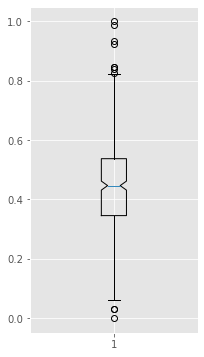

In [17]:
fig, ax1 = plt.subplots(figsize=(3, 6))
plt.boxplot(data[4], 1)
plt.show()

The method that is used in this type of charts to determine outliers bases on quartiles. Firstly, we need to calculate IQR which stands for interquartile range and is the difference between the third and the first quartile. Usually stating the limit of whiskers is: [Q1-IQR * 1.5, Q3 + IQR * 1.5]. All values that are outside this range are treated as outliers. It is connected with normal distribution and distance greater than 3 std dev.

However, this method cannot cope correctly with multidimensional data. There can be outliers that are still close to median but overall are far from other points. 

We will use *statsmodel* package which calculates a few interesting measures.

In [18]:
data.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']

model = sm.OLS(data.iloc[:,-1], data.iloc[:,:-1])
results = model.fit()
influence = results.get_influence()
sm_fr = influence.summary_frame()
sm_fr

,dfb_cylinders,dfb_displacement,dfb_horsepower,dfb_weight,dfb_acceleration,dfb_model_year,dfb_origin,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.149282,-0.021409,-0.031690,-0.061572,0.012817,-0.079705,0.021783,0.007391,1.689373,0.017805,0.227457,1.693466,0.228009
1,0.009129,0.009879,0.016853,-0.028737,0.010857,-0.014861,-0.000579,0.000353,0.367664,0.017946,0.049701,0.367251,0.049645
2,0.095248,-0.012133,0.047838,-0.093244,0.021120,-0.046328,-0.008468,0.004310,1.229393,0.019572,0.173699,1.230213,0.173814
3,0.047541,-0.018843,0.026841,-0.034825,0.013350,-0.023969,-0.011712,0.000775,0.492683,0.021861,0.073655,0.492198,0.073582
4,0.166939,-0.060634,0.027323,-0.070768,-0.011399,-0.058356,0.001045,0.007476,1.640072,0.019084,0.228762,1.643693,0.229267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,-0.020033,-0.000269,0.006696,0.012212,-0.006055,0.034577,-0.019155,0.000349,0.362243,0.018269,0.049415,0.361834,0.049359
388,0.006583,-0.020696,0.008191,0.025776,-0.044878,-0.005101,0.011007,0.000600,-0.415262,0.023779,-0.064811,-0.414815,-0.064741
389,-0.058754,0.029140,0.068237,-0.045877,-0.084620,0.262453,-0.087121,0.011348,1.941096,0.020648,0.281847,1.948130,0.282868
390,0.019040,0.009695,-0.021770,-0.004832,-0.019809,-0.043734,0.051242,0.001008,-0.634682,0.017219,-0.084011,-0.634189,-0.083946


**Task** Visualize residuals (*standard_resid*) with the usage of scatterplot. Draw also horizontal line on y-value = 0. Look at the chart. Are these values in a narrow row on y-value or you can identify that there are some outliers?

Jest co najmniej jeden wyraźny outlier - ten, którego 'standard_resid' ma wartość < -3

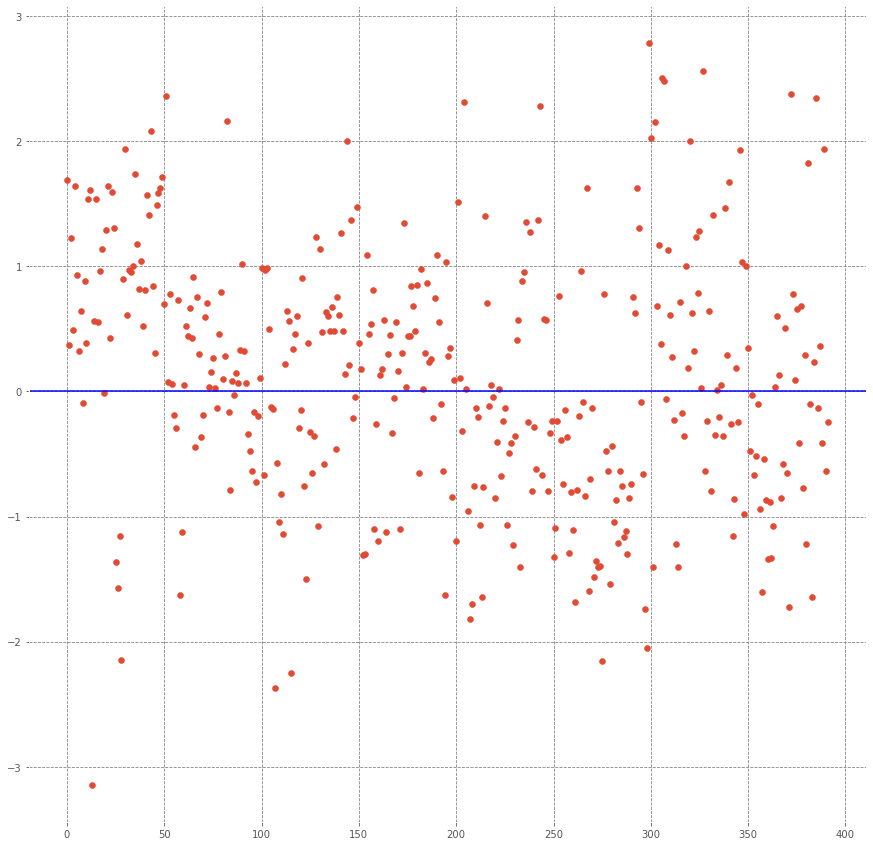

In [51]:
#TODO
fig, ax=plot_creator()

ax.scatter(range(0, sm_fr.shape[0]), sm_fr['standard_resid'])
ax.axhline(0, c="#0000FF")
plt.show()

#### DFFITS

This measure calculates the influence of i-th example on our regression equation by omitting this observation and comparing this model to previous one. Boundary values for our influential observations are +/- 2 * sqrt(1/number of observations)

**Task** Draw a plot where you visualise values of dffits as vertical lines (see: plt.vlines()) and horizontal lines (plt.axhline()) equal to boundaries of influential observations.

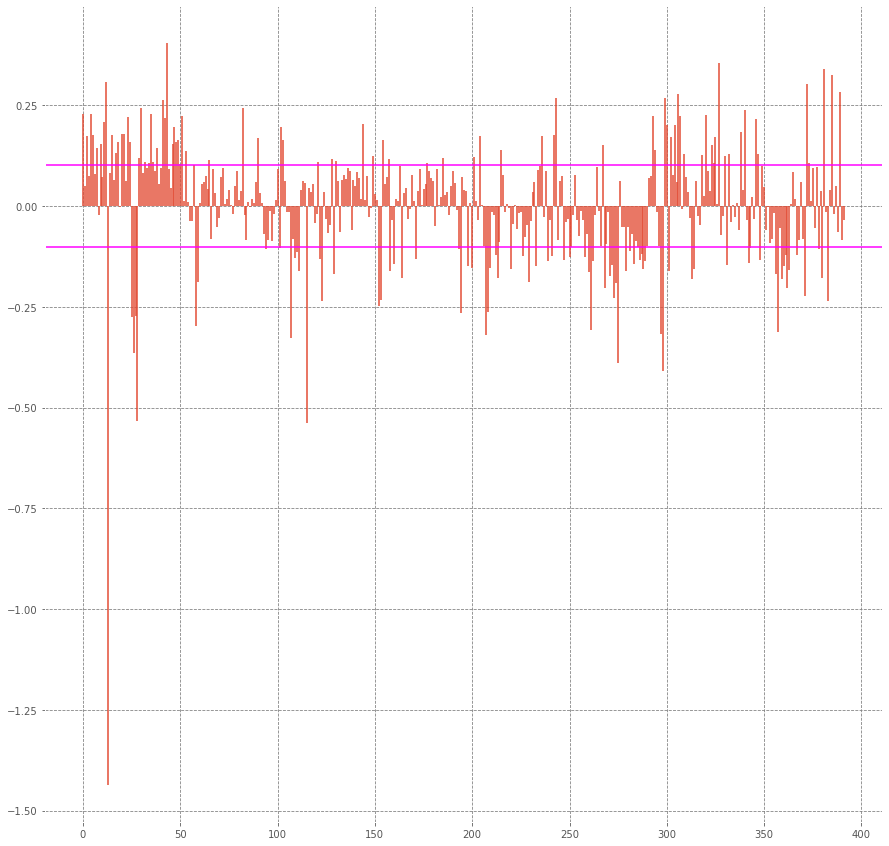

In [52]:
#TODO
fig, ax=plot_creator()

for i in range(sm_fr.shape[0]):
    ax.vlines([i], 0, sm_fr['dffits'][i])
ax.axhline(-2*np.sqrt(1/sm_fr.shape[0]), c="#FF00FF")
ax.axhline(2*np.sqrt(1/sm_fr.shape[0]), c="#FF00FF")
plt.show()

**Task** Get indices of those observations that are influential for diffits.

In [53]:
#TODO
all_elems=sm_fr['dffits'][np.abs(sm_fr['dffits'])>2*np.sqrt(1/sm_fr.shape[0])]
res_dffits=list(all_elems.index)
print(res_dffits)

[0, 2, 4, 5, 7, 9, 11, 12, 13, 15, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 38, 41, 42, 43, 46, 47, 48, 49, 50, 51, 53, 57, 58, 59, 65, 82, 90, 94, 101, 102, 103, 107, 109, 110, 111, 115, 121, 122, 123, 128, 129, 130, 144, 149, 152, 153, 154, 157, 158, 160, 164, 171, 177, 185, 193, 194, 198, 200, 201, 204, 207, 208, 209, 212, 213, 215, 220, 226, 229, 233, 236, 239, 241, 242, 243, 247, 250, 251, 258, 260, 261, 262, 267, 268, 271, 272, 273, 274, 275, 279, 281, 283, 285, 286, 287, 288, 289, 293, 294, 297, 298, 299, 300, 301, 302, 304, 306, 307, 309, 313, 314, 318, 320, 323, 324, 325, 327, 330, 331, 332, 338, 340, 342, 343, 346, 347, 348, 356, 357, 359, 360, 361, 362, 363, 367, 371, 372, 373, 378, 380, 381, 383, 385, 389]


#### COOK'S DISTANCE

Comparing to the previous, there is also made checking the influence of each observation. However, this time we check the difference of coefficients in our regression equation while we omit the i-th observation. The boundary of the influence is very often set to 4/number of observations.

**Task** Once again draw a plot where you visualise values of cooks_d as vertical lines and horizontal line equal to boundary of influential observations. *Tip* It might be useful to visualize square root of the values to make the chart more transparent.

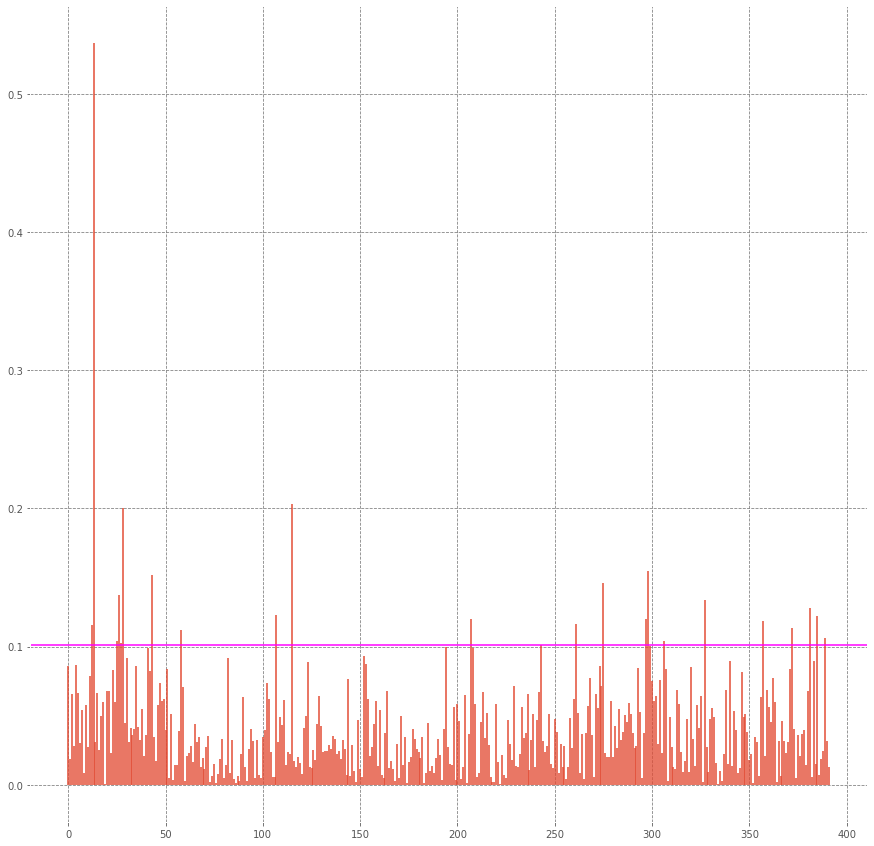

In [55]:
#TODO
#TODO
fig, ax=plot_creator()

for i in range(sm_fr.shape[0]):
    ax.vlines([i], 0, np.sqrt(sm_fr['cooks_d'][i]))
ax.axhline(np.sqrt(4/sm_fr.shape[0]), c="#FF00FF")
plt.show()

**Task** Get indices of those observations that are influential for Cook's distance.

In [56]:
#TODO
#TODO
all_elems2=sm_fr['cooks_d'][sm_fr['cooks_d']>4/sm_fr.shape[0]]
res_cook=list(all_elems2.index)
print(res_cook)

[12, 13, 25, 26, 27, 28, 43, 58, 107, 115, 207, 261, 275, 297, 298, 306, 327, 357, 372, 381, 385, 389]


**Task** Check if there are elements that appear on both lists. Maybe one list is subset of the second?

Tak, lista indeksów związana z dystansem cooka jest podzbiorem listy indeksów związanych z dffits

In [57]:
#TODO
set_1=set(res_dffits)
set_2=set(res_cook)

print(f'DFFITS set size: {len(set_1)}\nCook distance set size: {len(set_2)}\nnumber of elements in both sets: {len(set_1 & set_2)}')

DFFITS set size: 160
Cook distance set size: 22
number of elements in both sets: 22
